In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import os

In [2]:
import loader

src_dir = './data'
benchmarks = loader.load_benchmarks_from_dir(src_dir)
df = pd.DataFrame(benchmarks)
df.head()

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,label,filename
0,BM_CCA/cca_simplified_sv/DatasetFileIndex:0/ma...,0,0,BM_CCA/cca_simplified_sv/DatasetFileIndex:0/ma...,iteration,1,0,1,33,21.277545,1503.323035,ms,tml_full/ttbar_mu20/,cuda_cca.json
1,BM_CCA/cca_simplified_sv/DatasetFileIndex:1/ma...,0,1,BM_CCA/cca_simplified_sv/DatasetFileIndex:1/ma...,iteration,1,0,1,20,34.963654,3296.441827,ms,tml_full/ttbar_mu40/,cuda_cca.json
2,BM_CCA/cca_simplified_sv/DatasetFileIndex:2/ma...,0,2,BM_CCA/cca_simplified_sv/DatasetFileIndex:2/ma...,iteration,1,0,1,16,44.425600,5749.924185,ms,tml_full/ttbar_mu60/,cuda_cca.json
3,BM_CCA/cca_simplified_sv/DatasetFileIndex:3/ma...,0,3,BM_CCA/cca_simplified_sv/DatasetFileIndex:3/ma...,iteration,1,0,1,12,60.613563,11622.533302,ms,tml_full/ttbar_mu100/,cuda_cca.json
4,BM_CCA/cca_simplified_sv/DatasetFileIndex:4/ma...,0,4,BM_CCA/cca_simplified_sv/DatasetFileIndex:4/ma...,iteration,1,0,1,8,88.080671,26280.240893,ms,tml_full/ttbar_mu200/,cuda_cca.json


In [3]:
import preprocessor

df = preprocessor.transform_dataframe(df)
df.head()

,benchmark,programming_model,target_mode,environment,target,algorithm,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
0,cuda_cca,cuda,gpu,traccc,Nvidia A6000,simplified_sv,mu20,40191.3,2.127755,150.332303,ms,33,1
1,cuda_cca,cuda,gpu,traccc,Nvidia A6000,simplified_sv,mu40,68749.9,3.496365,329.644183,ms,20,1
2,cuda_cca,cuda,gpu,traccc,Nvidia A6000,simplified_sv,mu60,102344.5,4.442560,574.992418,ms,16,1
3,cuda_cca,cuda,gpu,traccc,Nvidia A6000,simplified_sv,mu100,171673.2,6.061356,1162.253330,ms,12,1
4,cuda_cca,cuda,gpu,traccc,Nvidia A6000,simplified_sv,mu200,323926.5,8.808067,2628.024089,ms,8,1


## Main helper function to plot bar charts

In [4]:
# The number of benchmarks for each run based on the different datasets used
nbr_of_benchmarks_per_run = len(df['dataset'].unique())
# Show a preview of a df listing the first dataset for each benchmark
def preview_df(df):
    return df[::nbr_of_benchmarks_per_run]

In [37]:
# data = list of data inputs
# datalabels = list of labels for the data
# labels = x value labels
def plot_multi_bar_chart(data, datalabels, labels, colors, title=None, filename=None):
    num_data = len(labels)
    num_bars = len(datalabels)

    X_axis = np.arange(num_data)

    # calculate the width of the figure dynamically based on number of data points
    FIG_WIDTH_CONSTANT_PER_BAR = 0.5
    fig_width = num_data*num_bars*FIG_WIDTH_CONSTANT_PER_BAR
    plt.figure(figsize=(fig_width,5))
       
    # calculate offset width
    TOTAL_WIDTH_ALL_BARS = 0.8 # basically defines the space between data of two different labels (not to confuse with datalabels)
    BAR_WIDTH = TOTAL_WIDTH_ALL_BARS / num_bars
    current_offset = -(BAR_WIDTH * (num_bars/2)) + BAR_WIDTH/2 # center the bars
    # iterate over data and adjust offset after each iteration
    for d, l, c in zip (data, datalabels, colors):
        plt.bar(X_axis + current_offset, d, BAR_WIDTH, label = l, color=c)
        current_offset += BAR_WIDTH

    plt.xticks(X_axis, labels)
    plt.xlabel("Dataset")
    plt.ylabel("Kernel Execution Time [ms]")
    plt.legend(loc="upper left")
    if title:
        plt.title(title)
    if filename:
        foldername = 'plots'
        if not os.path.exists(foldername):
            os.makedirs(foldername)
        plt.savefig(f'{foldername}/{filename}', format="pdf", bbox_inches="tight")
    plt.show()

In [6]:
# Keys generated using:
# df.groupby(['programming_model', 'target_mode', 'environment', 'algorithm']).size().index
color_map = {
    (   'cpp', 'single-core',   'traccc',              'sparse_ccl'): '#FFE599',
    (  'cuda',         'gpu',   'traccc',               'fast_sv_1'): '#EA6B66',
    (  'cuda',         'gpu',   'traccc',               'fast_sv_2'): '#A680B8',
    (  'cuda',         'gpu',   'traccc',           'simplified_sv'): '#7EA6E0',
    ('stdpar',         'gpu', 'isolated',               'fast_sv_2'): '#CDA2BE',
    ('stdpar',         'gpu', 'isolated', 'fast_sv_2_partition_128'): '#',
    ('stdpar',         'gpu', 'isolated', 'fast_sv_2_partition_256'): '#',
    ('stdpar',         'gpu', 'isolated', 'fast_sv_2_partition_512'): '#',
    ('stdpar',         'gpu', 'isolated',              'sparse_ccl'): '#FFF2CC',
    ('stdpar',         'gpu',   'traccc',               'fast_sv_1'): '#F19C99',
    ('stdpar',         'gpu',   'traccc',               'fast_sv_2'): '#B5739D',
    ('stdpar',         'gpu',   'traccc',           'simplified_sv'): '#A9C4EB',
    ('stdpar',         'gpu',   'traccc',              'sparse_ccl'): '#FFD966',
    ('stdpar',   'multicore', 'isolated',               'fast_sv_2'): '#C3ABD0',
    ('stdpar',   'multicore', 'isolated', 'fast_sv_2_partition_128'): '#',
    ('stdpar',   'multicore', 'isolated', 'fast_sv_2_partition_256'): '#',
    ('stdpar',   'multicore', 'isolated', 'fast_sv_2_partition_512'): '#',
    ('stdpar',   'multicore', 'isolated',              'sparse_ccl'): '#FFCE9F',
    ('stdpar',   'multicore',   'traccc',              'sparse_ccl'): '#',
    ('stdpar', 'single-core', 'isolated',               'fast_sv_2'): '#E1D5E7',
    ('stdpar', 'single-core', 'isolated', 'fast_sv_2_partition_128'): '#',
    ('stdpar', 'single-core', 'isolated', 'fast_sv_2_partition_256'): '#',
    ('stdpar', 'single-core', 'isolated', 'fast_sv_2_partition_512'): '#',
    ('stdpar', 'single-core', 'isolated',              'sparse_ccl'): '#FFE97A',
    ('stdpar', 'single-core',   'traccc',               'fast_sv_1'): '#F8CECC',
    ('stdpar', 'single-core',   'traccc',               'fast_sv_2'): '#E6D0DE',
    ('stdpar', 'single-core',   'traccc',           'simplified_sv'): '#D4E1F5',
    ('stdpar', 'single-core',   'traccc',              'sparse_ccl'): '#FAC65F',
}

In [7]:
# Returns a list eiterh based on a tuple or string based on input
def convert_to_list(str_or_tup):
    return list(str_or_tup) if isinstance(str_or_tup, tuple) else [str_or_tup]

In [8]:
# Create a label based on values in the dataframe. This function supposes that the result for df[(c1,c2,c3)]==(v1,v2,v3) has always the same content for fields
# columns = either single or tuple of column names
# value =  a unique identifier for a single benchmark having with matching values in column(s)
def construct_label(df, columns, value, fields):
    first_row = df[multi_column_mask(df, columns, value)].iloc[0]
    # initialize an empty string
    label = ''
    for field in fields:
        label = label + first_row[field] + ', '
    return label[:-2] # to remove trailing comma and space

In [9]:
# Fetch a color based on values in the dataframe for a particular benchmark.
# columns = either single or tuple of column names
# value =  a unique identifier for a single benchmark having with matching values in column(s)
def fetch_color(df, columns, value):
    first_row = df[multi_column_mask(df, columns, value)].iloc[0]
    color_key = (first_row['programming_model'], first_row['target_mode'], first_row['environment'], first_row['algorithm'])
    return color_map[color_key]

In [10]:
# columns: tuple
# values: tuple (same size as columns)
def multi_column_mask(df, columns, values):
    # Create first an index over the columns 
    c_list = convert_to_list(columns) # because columns can be string or tuple
    return df.set_index(c_list).index == values

In [31]:
# Plots a multi-column bar plot chart for a dataset based on the distinctive values within one column. 
# Label fields determines the columns used to build the labels in the legend (e.g. ('programming_model', 'environment', 'target_mode'))
def plot_df(df, distinct_columns, label_fields, title=None, override_colors=None):
    # Extract data from dataframe for plot
    dc_list = convert_to_list(distinct_columns) # special because distinct_columns can be string or tuple
    distinct_rows = list(df.groupby(dc_list).size().index) # are the identifier for groupings in this visualization
    data = [df.loc[multi_column_mask(df, distinct_columns, row), 'kernel_time'].tolist() for row in distinct_rows]
    labels = [construct_label(df=df,
                              columns=distinct_columns,
                              value=row,
                              fields=label_fields)
                    for row in distinct_rows]
    colors = [fetch_color(df, columns=distinct_columns, value=row) for row in distinct_rows]
    datasets = df['dataset'].unique().tolist()
    
    if override_colors:
        # Override colors specified as (index, color) pairs
        for override in override_colors:
            colors[override[0]] = override[1]
    
    plot_multi_bar_chart(
        data=data,
        datalabels=labels,
        labels=datasets,
        colors=colors,
        title=title,
        filename=title
    )

### Prepare all possible masks for filtering the dataframe later

In [41]:
# Mask for all benchmarks ran on the alternative GPU geforce2080
geforce_benchmarks = df.query("benchmark.str.contains('geforce_2080')")['benchmark']
geforce_mask = df['benchmark'].isin(geforce_benchmarks)

# Mask for all benchmarks focusing on the effect of overclocking
overclock_benchmarks = df.query("benchmark.str.contains('overclock')")['benchmark']
overclock_mask = df['benchmark'].isin(overclock_benchmarks)

# Mask for all benchmarks using an SV algorithm
sv_algo_benchmarks = df.query("algorithm.str.contains('_sv')")['algorithm']
sv_algo_mask = df['algorithm'].isin(sv_algo_benchmarks)

# Mask for all benchmarks focusing on the impact of partition size
partitioning_benchmarks = df.query("algorithm.str.contains('partition')")['algorithm']
partitioning_mask = df['algorithm'].isin(partitioning_benchmarks)

# Programming model masks
cpp_mask = df['programming_model'] == 'cpp'
cuda_mask = df['programming_model'] == 'cuda'
stdpar_mask = df['programming_model'] == 'stdpar'

# Environment masks
traccc_mask = df['environment'] == 'traccc'
isolated_mask = df['environment'] == 'isolated'

# Target mask
gpu_mask = df['target_mode'] == 'gpu'
singlecore_mask = df['target_mode'] == 'single-core'
multicore_mask = df['target_mode'] == 'multicore'

# Algorithm mask
sparse_ccl_mask = df['algorithm'] == 'sprase_ccl'
simplified_sv_mask = df['algorithm'] == 'simplified_sv'
fast_sv_one_mask = df['algorithm'] == 'fast_sv_1'
fast_sv_two_mask = df['algorithm'] == 'fast_sv_2'

## Compare isolated environment with traccc

In [44]:
def plot_isolated_env_vs_traccc(df, algorithm_name):
    plot_df(df=df,
        distinct_columns='benchmark',
        label_fields=('target_mode','environment'), 
        title=f'Performance of {algorithm_name} in traccc vs. isolated environment')

In [42]:
# Get all stdpar benchmarks using fast_sv_2 (except the one from other GPU)
masked = df.loc[~geforce_mask & ~ overclock_mask & stdpar_mask]
fast_sv_two = masked[masked['algorithm'] == 'fast_sv_2']
preview_df(fast_sv_two)

,benchmark,programming_model,target_mode,environment,target,algorithm,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
168,stdpar_cca_gpu,stdpar,gpu,traccc,Nvidia A6000,fast_sv_2,mu20,40191.3,63.968937,275.816659,ms,1,1
216,stdpar_cca_nostdpar,stdpar,single-core,traccc,Intel Xeon Gold 5220,fast_sv_2,mu20,40191.3,6.182262,150.528085,ms,12,1
222,fast_sv_gpu,stdpar,gpu,isolated,Nvidia A6000,fast_sv_2,mu20,40191.3,60.695642,198.189951,ms,1,1
246,fast_sv_multicore,stdpar,multicore,isolated,Intel Xeon Gold 5220,fast_sv_2,mu20,40191.3,1.876187,129.382973,ms,34,1
270,fast_sv_nostdpar,stdpar,single-core,isolated,Intel Xeon Gold 5220,fast_sv_2,mu20,40191.3,5.541905,146.272219,ms,11,1


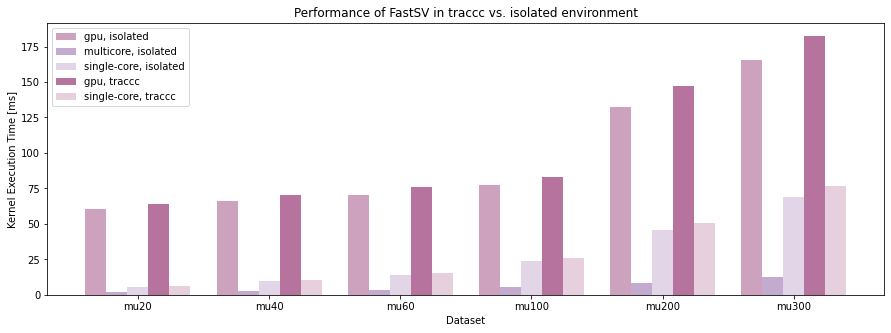

In [45]:
plot_isolated_env_vs_traccc(fast_sv_two, 'FastSV')

In [16]:
# Get all stdpar benchmarks using fast_sv_2 (except the one from other GPU)
masked = df.loc[~geforce_mask & ~ overclock_mask]
sparse_ccl = masked[masked['algorithm'] == 'sparse_ccl']
preview_df(sparse_ccl)

,benchmark,programming_model,target_mode,environment,target,algorithm,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
36,seq_cca,cpp,single-core,traccc,Intel Xeon Gold 5220,sparse_ccl,mu20,40191.3,2.340621,2.759447,ms,30,1
150,stdpar_cca_gpu,stdpar,gpu,traccc,Nvidia A6000,sparse_ccl,mu20,40191.3,100.622242,393.128219,ms,1,1
198,stdpar_cca_nostdpar,stdpar,single-core,traccc,Intel Xeon Gold 5220,sparse_ccl,mu20,40191.3,3.237994,23.922844,ms,22,1
294,sparse_ccl_gpu,stdpar,gpu,isolated,Nvidia A6000,sparse_ccl,mu20,40191.3,36.802747,179.403852,ms,2,1
300,sparse_ccl_multicore,stdpar,multicore,isolated,Intel Xeon Gold 5220,sparse_ccl,mu20,40191.3,0.777245,20.695287,ms,90,1
306,sparse_ccl_nostdpar,stdpar,single-core,isolated,Intel Xeon Gold 5220,sparse_ccl,mu20,40191.3,1.173118,31.950126,ms,58,1


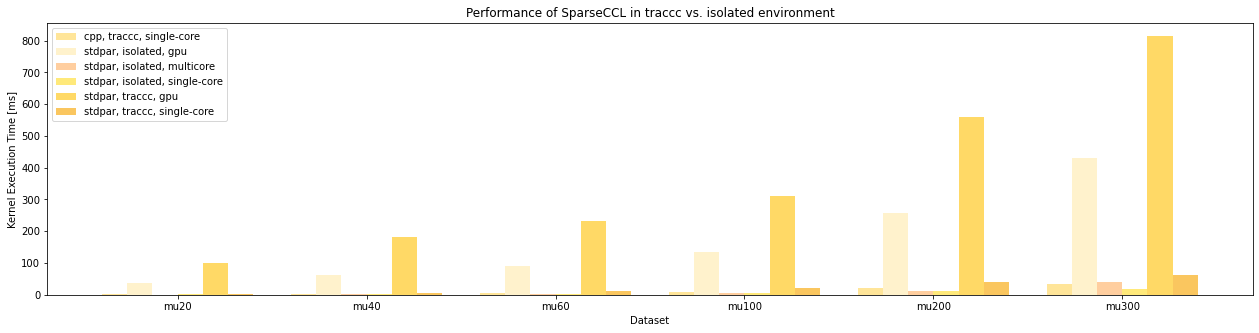

In [36]:
plot_isolated_env_vs_traccc(sparse_ccl, 'SparseCCL')

It can be said, that it is valid to take measurements from isolated env into account for the multicore execution of FastSV and SparseCCL.

It might become easier to interprete when calculating the differences between gpu and single-core version in both environments

## Compare the different FastSV versions on GPU with CUDA and stdpar

In [18]:
sv_algos = df[sv_algo_mask & ~partitioning_mask & ~geforce_mask & traccc_mask & gpu_mask]
preview_df(sv_algos)

,benchmark,programming_model,target_mode,environment,target,algorithm,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
0,cuda_cca,cuda,gpu,traccc,Nvidia A6000,simplified_sv,mu20,40191.3,2.127755,150.332303,ms,33,1
6,cuda_cca,cuda,gpu,traccc,Nvidia A6000,fast_sv_1,mu20,40191.3,2.092412,150.295505,ms,33,1
12,cuda_cca,cuda,gpu,traccc,Nvidia A6000,fast_sv_2,mu20,40191.3,2.102335,149.758046,ms,33,1
156,stdpar_cca_gpu,stdpar,gpu,traccc,Nvidia A6000,simplified_sv,mu20,40191.3,56.328922,268.362841,ms,1,1
162,stdpar_cca_gpu,stdpar,gpu,traccc,Nvidia A6000,fast_sv_1,mu20,40191.3,59.581604,272.268368,ms,1,1
168,stdpar_cca_gpu,stdpar,gpu,traccc,Nvidia A6000,fast_sv_2,mu20,40191.3,63.968937,275.816659,ms,1,1


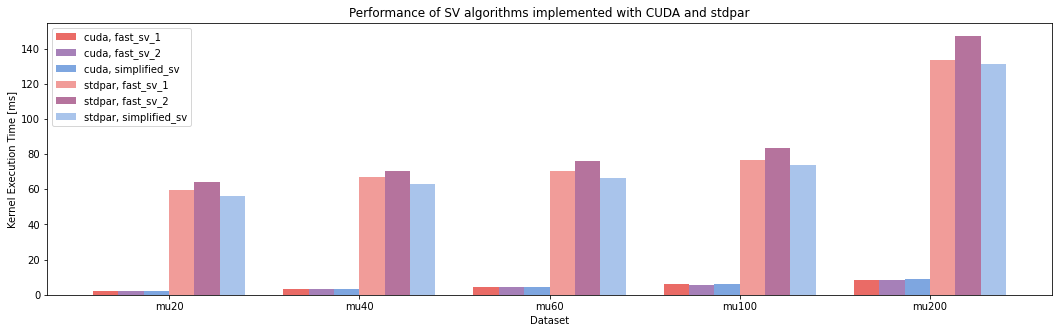

In [19]:
plot_df(df=sv_algos,
        distinct_columns=('programming_model', 'algorithm'),
        label_fields=('programming_model', 'algorithm'), 
        title=f'Performance of SV algorithms implemented with CUDA and stdpar')

## Compare GPUs: A6000 vs GeForce2080

In [21]:
gpu_comparison = df[fast_sv_two_mask & traccc_mask & gpu_mask]
preview_df(gpu_comparison)

,benchmark,programming_model,target_mode,environment,target,algorithm,dataset,activations,kernel_time,cpu_time,time_unit,iterations,repetitions
12,cuda_cca,cuda,gpu,traccc,Nvidia A6000,fast_sv_2,mu20,40191.3,2.102335,149.758046,ms,33,1
30,cuda_cca_geforce_2080,cuda,gpu,traccc,Nvidia GeForce 2080,fast_sv_2,mu20,40191.3,2.082098,149.430756,ms,34,1
168,stdpar_cca_gpu,stdpar,gpu,traccc,Nvidia A6000,fast_sv_2,mu20,40191.3,63.968937,275.816659,ms,1,1
192,stdpar_cca_gpu_geforce_2080,stdpar,gpu,traccc,Nvidia GeForce 2080,fast_sv_2,mu20,40191.3,6.122069,148.723324,ms,11,1


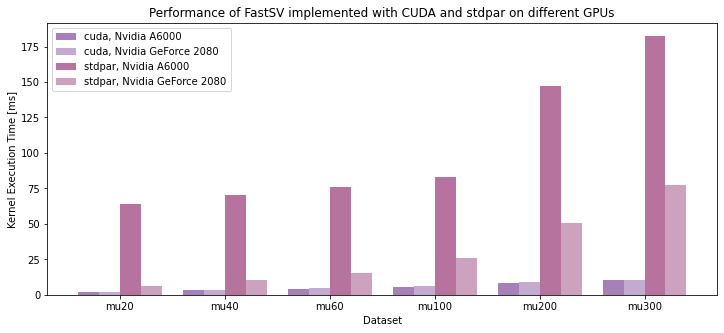

In [39]:
plot_df(df=gpu_comparison,
        distinct_columns=('benchmark', 'programming_model', 'target'),
        label_fields=('programming_model', 'target'), 
        title=f'Performance of FastSV implemented with CUDA and stdpar on different GPUs',
        override_colors=[(1, '#C3ABD0'), (3, '#CDA2BE')]
       )

In [26]:
list(df.groupby(['benchmark']).size().index)

['cuda_cca',
 'cuda_cca_geforce_2080',
 'fast_sv_gpu',
 'fast_sv_multicore',
 'fast_sv_nostdpar',
 'seq_cca',
 'sparse_ccl_gpu',
 'sparse_ccl_multicore',
 'sparse_ccl_multicore_t16_no_overclock',
 'sparse_ccl_multicore_t16_overclocked',
 'sparse_ccl_multicore_t1_no_overclock',
 'sparse_ccl_multicore_t1_overclocked',
 'sparse_ccl_multicore_t2_no_overclock',
 'sparse_ccl_multicore_t2_overclocked',
 'sparse_ccl_multicore_t32_no_overclock',
 'sparse_ccl_multicore_t32_overclocked',
 'sparse_ccl_multicore_t4_no_overclock',
 'sparse_ccl_multicore_t4_overclocked',
 'sparse_ccl_multicore_t64_no_overclock',
 'sparse_ccl_multicore_t64_overclocked',
 'sparse_ccl_multicore_t72_no_overclock',
 'sparse_ccl_multicore_t72_overclocked',
 'sparse_ccl_multicore_t8_no_overclock',
 'sparse_ccl_multicore_t8_overclocked',
 'sparse_ccl_nostdpar',
 'sparse_ccl_nostdpar_t1_no_overclock',
 'sparse_ccl_nostdpar_t1_overclocked',
 'stdpar_cca_gpu',
 'stdpar_cca_gpu_geforce_2080',
 'stdpar_cca_nostdpar']

Very suspicious values for stdpar a6000. Also the CPU time is a lot higher?

Maybe rerun that benchmark?